# Project: Tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this projest I'm going to investigate and analyse Tmdb-movies dataset. Tmdb-movies dataset contains information about the movie popularity, rating, genre, cast, directors, budget, revenue, releasedate and production companies.

### Question(s) for Analysis

<b>Q1: Is the movie rating affect the revenue?       </b>     
<b>Q2: Are higher budget movies get higher revenue?</b>          
<b>Q3: Which genres are most popular from year to year?</b>                                             
<b>Q4: How much movie released year by year?</b>                            
<b>Q5: In which year we had the most movies making profits?</b>                                
<b>Q6: Which movie earned the most and the least profit?</b>                        
<b>Q7: Which actor has appeared the most?</b>                           
<b>Q8: Which director has appeared the most?</b>                           

### ----------------------------------------------------------------------------------------


In [1]:
# import liberies that i could use in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<b>In this step, I will load the data and clean it for exploration and analysis.</b>


In [2]:
#Load data and print out first two rows.
#use pasrse_dates function to convert  release_date to date type.
df = pd.read_csv('tmdb-movies.csv',parse_dates=['release_date'])
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#number of columns and rows
df.shape

(10866, 21)

In [4]:
#columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [5]:
#check duplicate rows
df.duplicated().sum()

1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

Drop unnessary columns:                                                                 
id,imdb_id,homepage,budget,revenue,tagline,overview,release_date,keywords.

In [7]:
df.drop(['id','imdb_id','homepage','budget','revenue','tagline','overview','release_date','keywords'], axis=1, inplace=True)

In [8]:
#cehck Null values in each column
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

  <b>                                
76 rows null in cast.                                        
44 rows null in director.                                
23 rows null in genres.                                                
1030 rows null in production_companies.     </b>                                   

In [9]:
#remove one duplicated row
df.drop_duplicates(inplace = True)
#check duplicate rows
df.duplicated().sum()

0

<b>Rename budget_adj to budget and revenue_adj to revenue.</b>

In [10]:
#rename columns for better readability
df.rename({'budget_adj':'budget', 'revenue_adj':'revenue'}, axis = 1, inplace=True)
df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [11]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


<b>Drop all rows that contain null values.</b>

In [12]:
#remove rows with null values
df.dropna(inplace = True)
df.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget                  0
revenue                 0
dtype: int64

In [13]:
#number of columns and rows
df.shape

(9772, 12)

<b>Column genres has multiple values separated  by | so
I will split these columns by '|' to convert them to lists to explode it.</b>

In [14]:
df['genres']=df['genres'].str.split("|")

In [15]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


<b>Create new data frame 'df_genres' and use explode function to extract elements from genres list and make new rows.</b>

In [16]:
df_genres=df.explode('genres')

In [17]:
df_genres.shape

(24650, 12)

In [18]:
df_genres.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


<b>Create new dataFrame df_profit to calculate the profit from budget and revenue but before that I will delete movies that budget and revenue is 0.</b>

In [19]:
#create df_profit from df
df_profit = df.copy()

In [20]:
#replace the value of 0 to NaN 
df_profit[['budget','revenue']] = df_profit[['budget','revenue']] .replace(0, np.NaN)

In [21]:
#drop rows that contain null values in 'budget','revenue'
df_profit.dropna(subset = ['budget','revenue'], inplace = True)

In [22]:
df_profit.shape

(3805, 12)

In [23]:
#change type of revenue , budget to be more readable
df_profit['revenue'] = df_profit['revenue'].astype('int64')
df_profit['budget'] = df_profit['budget'].astype('int64')
#add new column for profit
df_profit['profit'] =  df_profit['revenue'] - df_profit['budget']

In [24]:
df_profit.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,1254445953


<a id='eda'></a>
## Exploratory Data Analysis

In this step, I'm going to explore the data and relations more. Also, visualizing and answering the question that I asked above.

In [25]:
#show correlation between data
df_profit.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
popularity,1.000000,0.213690,0.779125,0.319927,0.175991,0.395330,0.544761,0.515125
runtime,0.213690,1.000000,0.273464,0.359173,-0.113488,0.333453,0.279733,0.234491
vote_count,0.779125,0.273464,1.000000,0.389853,0.209688,0.495209,0.653202,0.612792
vote_average,0.319927,0.359173,0.389853,1.000000,-0.135646,0.035798,0.268227,0.290195
release_year,0.175991,-0.113488,0.209688,-0.135646,1.000000,0.078378,-0.101931,-0.131448
budget,0.395330,0.333453,0.495209,0.035798,0.078378,1.000000,0.567983,0.401797
revenue,0.544761,0.279733,0.653202,0.268227,-0.101931,0.567983,1.000000,0.981896
profit,0.515125,0.234491,0.612792,0.290195,-0.131448,0.401797,0.981896,1.000000


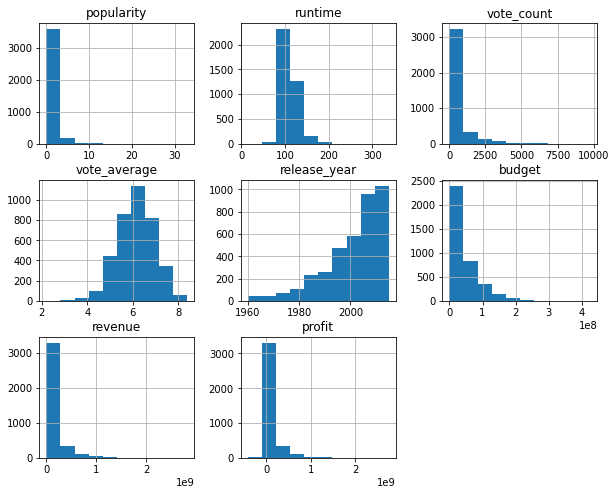

In [26]:
# explore the data.
df_profit.hist(figsize=(10,8));

### Q1: Is the movie rating influence the revenue?


In [27]:
# Counting the revenue average  
revenue_ave = df_profit['revenue'].mean()
revenue_ave

138715933.8675427

<b>Create 2 dataFrame higher_revenue is all revenues above the average revenue and lower_revenue is all revenues below or equal the average revenue.</b>

In [28]:
higher_revenue = df_profit[df_profit['revenue'] > revenue_ave]
lower_revenue = df_profit[df_profit['revenue'] <= revenue_ave]

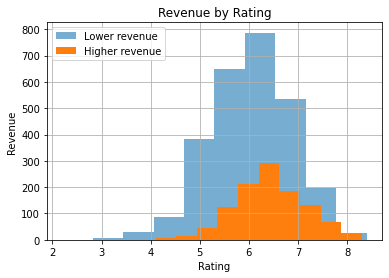

In [29]:
lower_revenue.vote_average.hist(alpha=0.6, label='Lower revenue')
higher_revenue.vote_average.hist(label='Higher revenue')

#title
plt.title('Revenue by Rating')

#x axis label
plt.xlabel('Rating')

#y axis label
plt.ylabel('Revenue')

#show legend
plt.legend();

plt.show()

As we can see above the Lower revenue has no relevance how good the rating is. But it may effect on the bad rating. So on the histogram, we can see that all the lower_revenue and higher_revenue are equal on the good rating but on the other hand approximately only the lower revenue who gets the low voting

### Question 2 : Are higher budget movies get higher revenue?

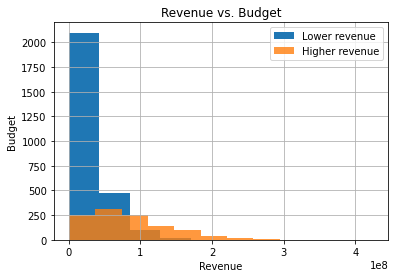

In [30]:
lower_revenue.budget.hist(label='Lower revenue')
higher_revenue.budget.hist(alpha=0.8,label='Higher revenue')

#title
plt.title('Revenue vs. Budget')

#x axis label
plt.ylabel('Budget')

#y axis label
plt.xlabel('Revenue')

#show legend
plt.legend();

plt.show()

Unexpectedly the result shows that the movies that had a lower budget had more revenue.



### Question 3 : Which genres are most popular from year to year?

In [31]:
#Create new dataframe 'pivot table' pivot_year_popularity to group by 'release_year','genres'
pivot_year_popularity=df_genres.groupby(['release_year','genres'],as_index = False)[['popularity']].agg('max').pivot('release_year','genres').fillna(0)
pivot_year_popularity.head(1)

popularity                                                      \
genres           Action Adventure Animation    Comedy     Crime Documentary   
release_year                                                                  
1960           1.872132  1.872132       0.0  0.947307  0.423531         0.0   

                                                                          \
genres           Drama    Family   Fantasy   Foreign   History    Horror   
release_year                                                               
1960          2.610362  0.465879  0.712389  0.194948  1.136943  2.610362   

                                                                             \
genres           Music Mystery   Romance Science Fiction TV Movie  Thriller   
release_year                                                                  
1960          0.423531     0.0  0.947307        0.712389      0.0  2.610362   

                                  
genres             War   Western  
release_year                      
1960          0.256779  1.872132

In [32]:
# prepare x and y axis to draw the plot
lis=np.array(range(1960,2016,1))
genre = []
popularity = []
for i in lis:
    genre.append(pivot_year_popularity.loc[i].sort_values(ascending=False).index[0][1])
    popularity.append(round(pivot_year_popularity.loc[i].sort_values(ascending=False)[0],2))

In [33]:
# combine year and genre
co=[]
for i in range(len(lis)):
    co.append('The '+genre[i]+' is the most genre in '+str(lis[i]))

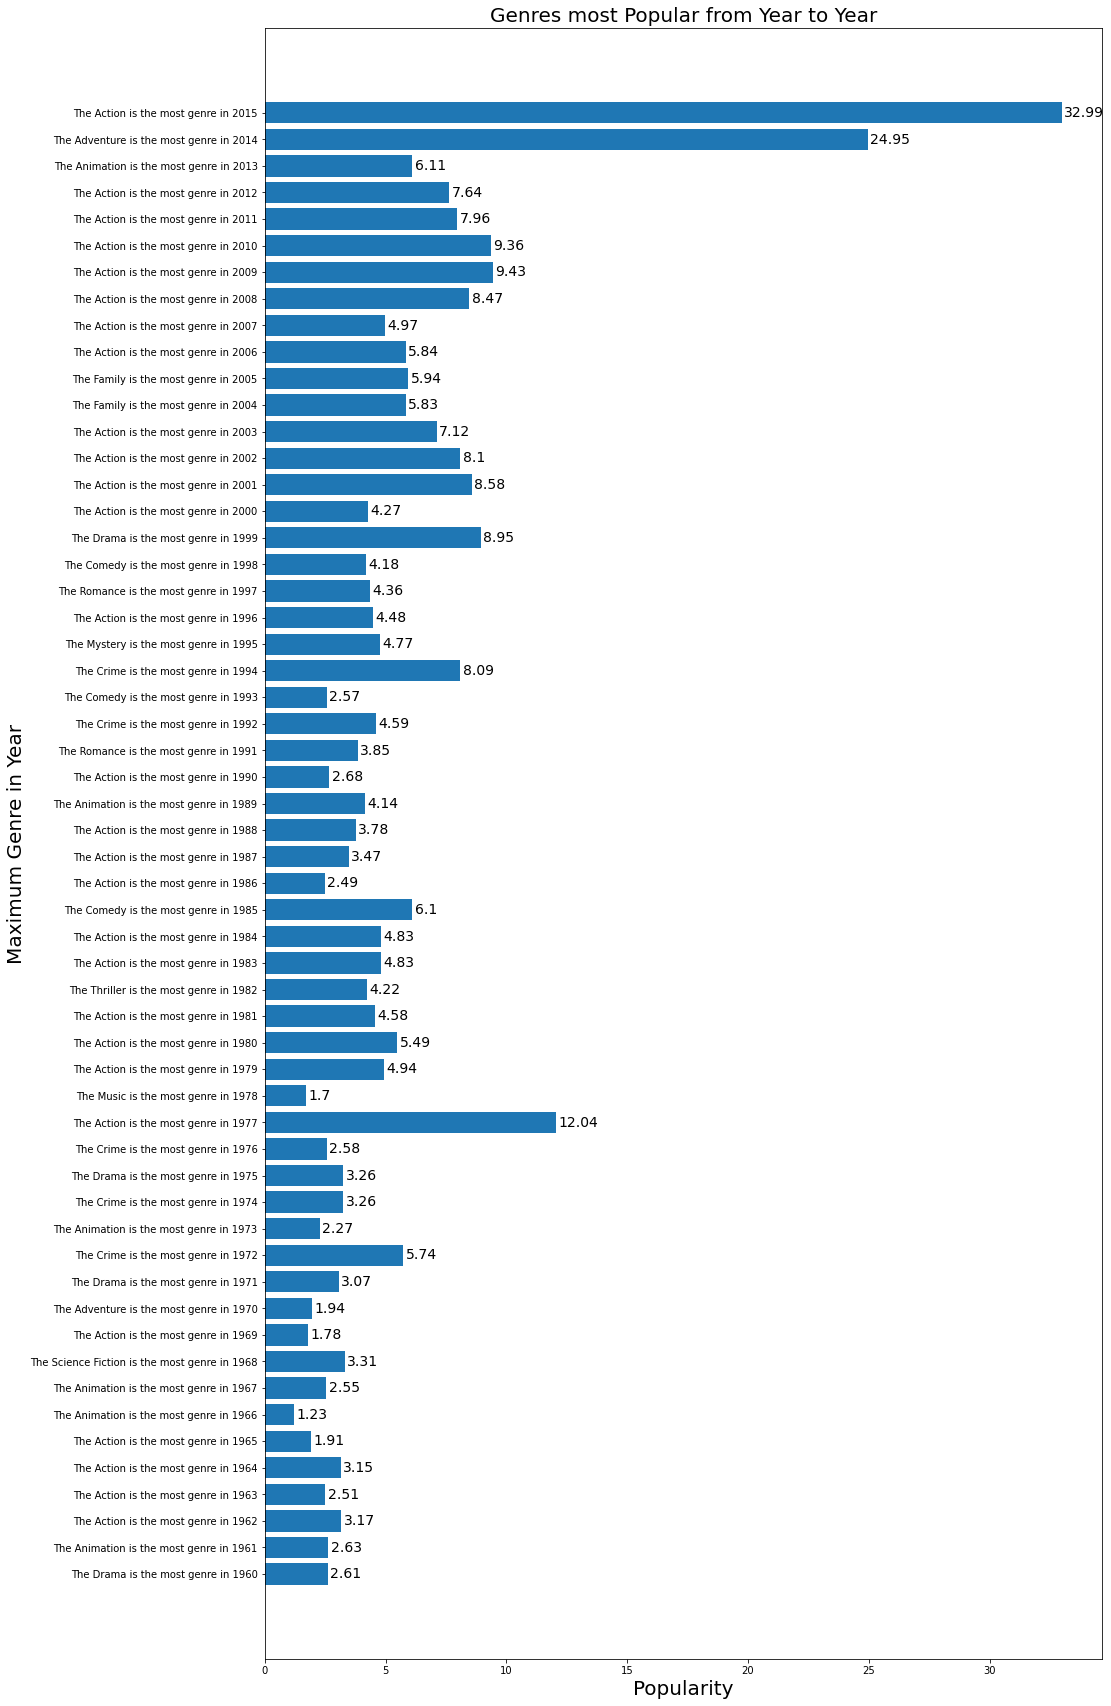

In [34]:
#assign x axis
x = co

#assign y axis
y = popularity

#the figure size(width, height)
fig, ax = plt.subplots(figsize=(15,30))

#the width of the bars 
width = 0.8

#the x locations for the groups
ind = np.arange(len(y)) 

ax.barh(ind, y, width)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)

#to show popularity side the bar
for i, v in enumerate(y):
    ax.text(v+.1, i, str(v), color='black', fontsize=14, va='center',ha='left')

#title
ax.set_title('Genres most Popular from Year to Year',fontsize = 20)

#x axis label
ax.set_ylabel('Maximum Genre in Year',fontsize = 20)

#y axis label
ax.set_xlabel('Popularity',fontsize=20)

plt.show()

Genres most Popular from Year to Year chart shows popular Genre for each year like in 2015 Action is the popular Genre and its popularity is 32.99.

### Question 4 : How much movie released year by year?


In [35]:
#get number of movie in each year
release = df.groupby('release_year').size()

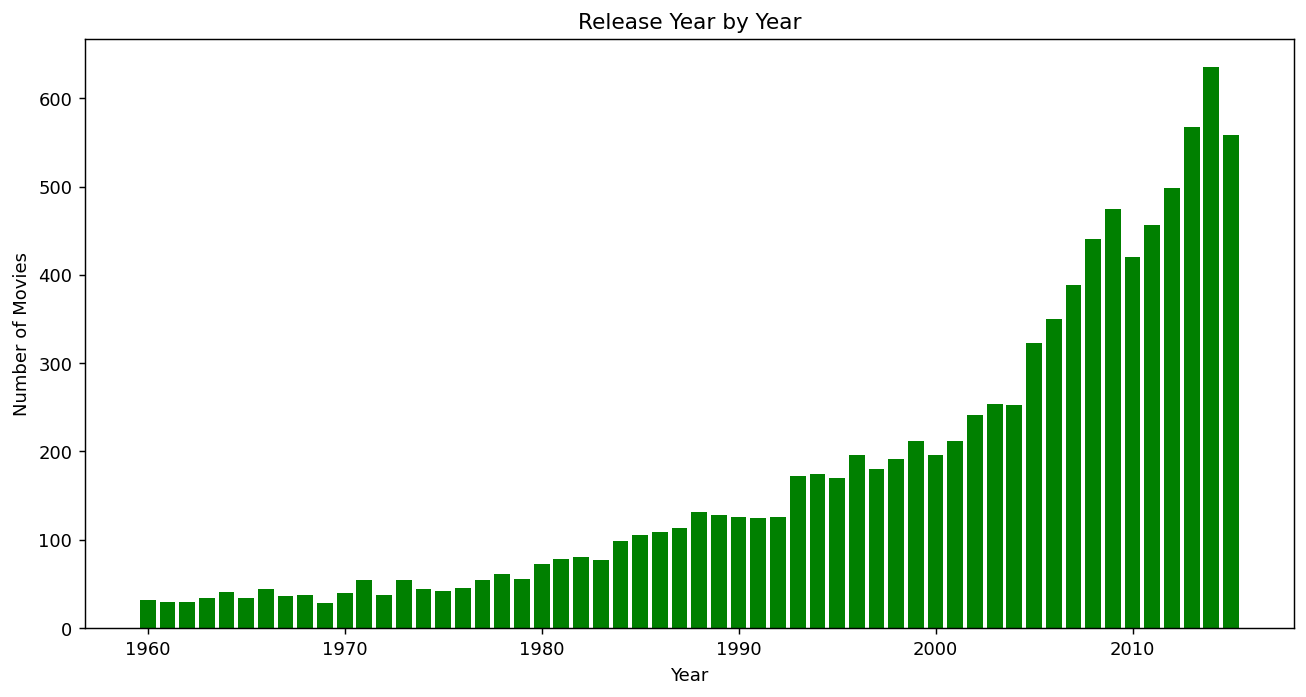

In [36]:
#set size
plt.figure(figsize=(12,6), dpi = 130)

#plot line chart for number of release
plt.bar(release.index,release, color = 'g')

#title
plt.title('Release Year by Year')

#x axis label
plt.xlabel('Year')

#y axis label
plt.ylabel('Number of Movies');

plt.show()

This chart shows the number of movies for each year and we see that 2014 is the most movies count by 635 movie.

In [37]:
#the year that have highest movie count
release.idxmax()

2014

In [38]:
release[2014]

635

In [39]:
#the year that have lowest movie count
release.idxmin()

1969

In [40]:
release[1969]

29

### Question 6 : In which year we had the most movies making profits?

In [41]:
#profit for each year
profits_for_each_year = df_profit.groupby('release_year')['profit'].sum()

In [42]:
profits_for_each_year.head()

release_year
1960     797740716
1961    2181770346
1962    1202944839
1963     821753299
1964    2071667861
Name: profit, dtype: int64

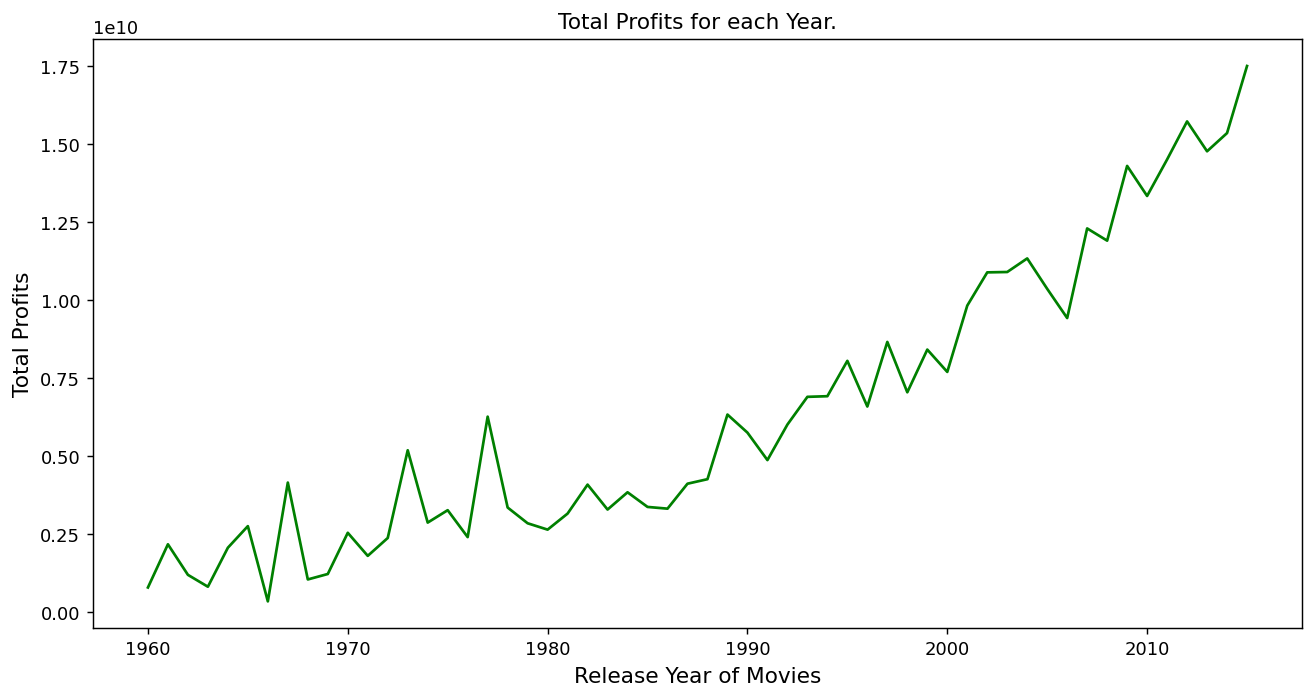

In [43]:
#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#x axis label
plt.xlabel('Release Year of Movies', fontsize = 12)
#y axis label
plt.ylabel('Total Profits', fontsize = 12)
#title 
plt.title('Total Profits for each Year.')

#line plot
plt.plot(profits_for_each_year , color = 'g')

#showing the plot
plt.show()

This chart shows the total revenue of each year and we see that highest profit year is 2015

In [44]:
#which year made the highest profit
profits_for_each_year.idxmax()

2015

In [45]:
#which year made the lowest profit
profits_for_each_year.idxmin()

1966

### Question 6 : Which movie earned  the most and the least  profit?

In [46]:
#get index of highest profit movie
highest_id = df_profit['profit'].idxmax()

df_profit.loc[highest_id]

popularity                                                      12.037933
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
runtime                                                               121
genres                               [Adventure, Action, Science Fiction]
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
vote_count                                                           4428
vote_average                                                          7.9
release_year                                                         1977
budget                                                           39575591
revenue                                                        2789712242
profit                                                         2750136651
Name: 1329, dtype: object

In [47]:
df_profit.loc[highest_id].original_title                                                  

'Star Wars'

Star Wars is highest profit movie.

In [48]:
#get index of lowest profit movie
lowest_id = df_profit['profit'].idxmin()

df_profit.loc[lowest_id]

popularity                                                        0.25054
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                    [Adventure, Fantasy, Action, Western, Thriller]
production_companies                             Boram Entertainment Inc.
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
budget                                                          425000000
revenue                                                          11087569
profit                                                         -413912431
Name: 2244, dtype: object

In [49]:
df_profit.loc[lowest_id].original_title                                                  

"The Warrior's Way"

The Warrior's Way is lowest profit movie.

### Question 7 : Which actor has appeared the most?

In [50]:
#function which will take any column as argument from which data is need to be extracted and keep track of count
def get_count(column):
    
    #will take cast column and separate the string by '|'
    all_data = df[column].str.cat(sep = '|')
    
    #put all names in pandas series and split by '|'
    all_data = pd.Series(all_data.split('|'))
    
    #get count for each name in our series descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [51]:
#this will variable will store the return value from a function
actor_count = get_count('cast')
#shwoing top 5 values
actor_count.head()

Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
Michael Caine        52
dtype: int64

Robert De Niro is the most actor has appeared.

### Question 8 : Which director has appeared the most?

In [52]:
#this will variable will store the return value from a function
director_count = get_count('director')
#shwoing top 5 values
director_count.head()

Woody Allen         43
Clint Eastwood      34
Steven Spielberg    30
Martin Scorsese     28
Ridley Scott        23
dtype: int64

Woody Allen is the most director has appeared.

<a id='conclusions'></a>
## Conclusions

Our data about movies with some characteristics like movie revenue, budget, release date and so on.
After loading data and I made some cleaning and modification tasks like drop duplicate and rename columns
then I made 3 dataframe df is main and df_genres,df_profit for the specific exploration tasks. 

Here I conclude my analysis for TMDB Movies Dataset with answer on above questions :     

In conclusion, after an investigation in TMDb movie dataset, we can assure that the budget would not impact the revenues so many movies have a small budget but got higher revenues.

Good ratings will not effect the revenues too but the bad ratings will do.

At last we can find that movies get lower revenues by years.                  

That number of movies increase year by year until 2014 but it's decreased in 2015, also we have known that 2014 is the highest movie count by 635 movie and 1969 is the lowest movie count by 29 movie.

Movies profits in each year , we have known that 2015 is the highest movies profits year and 1969 is the lowest movies profits year.

we have known that Star Wars in 1977 is highest profit movie and  The Warrior's Way in 2010 is lowest profit movie.


if we want to hire director and actors we can get th most popular 

Choose any actor from this 

                                                            Actor                movies number
                                                            RobertDe Niro        72
                                                            Samuel L. Jackson    70
                                                            Bruce Willis         62
                                                            Nicolas Cage         61
                                                            Michael Caine        52.                                           
                                                            
Choose any director from this 

                                                            Director             movies number
                                                            Woody Allen          43
                                                            Clint Eastwood       34
                                                            Steven Spielberg     30
                                                            Martin Scorsese      28
                                                            Steven Soderbergh    23.
                                                            

## Limitations

Dupicate rows and null values rows affect on any exploration ,so I remove all duplicate rows and null values rows.

For df_profit I used revenue or budget to calculate the profit so I removed all rows that revenue or budget is equal zero.

I couldn't find relation bewteen revenue and rate but it may on the bad rating.
we can see that all the lower_revenue and higher_revenue are equal on the good rating but on the other hand approximately only the lower revenue who gets the low voting.
Also couldn't find relation bewteen revenue and budget the result shows that is not with higher budget make higher revenue and  the movies that had a lower budget had more revenue.

Thanks  ^_^ .

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1